In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [21]:
#load dataset 
data_set = pd.read_csv('original.csv')
data_set

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


<function matplotlib.pyplot.show(*args, **kw)>

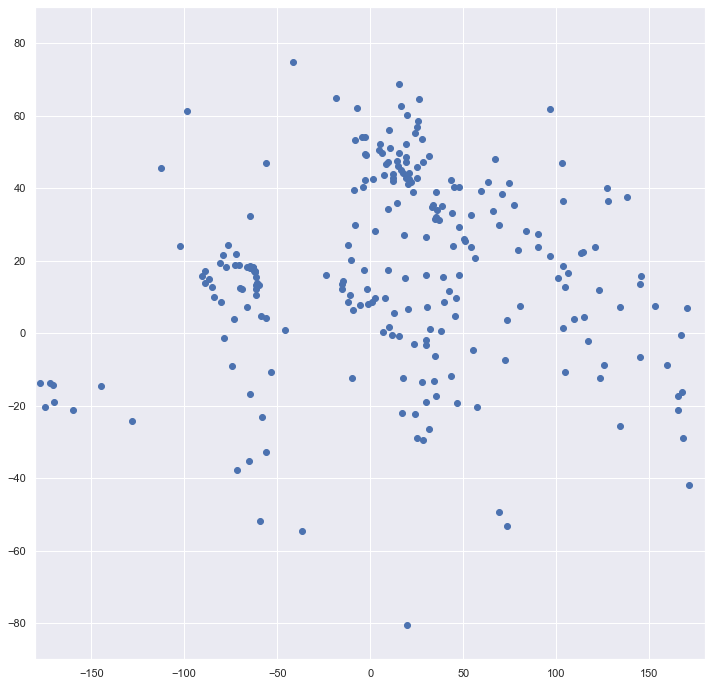

In [22]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as x, and the latitude as y
plt.figure(figsize=(12,12))
plt.scatter(data_set['Longitude'],data_set['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [23]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data_set.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [24]:
# applying kmeans algorithim 
kmeans = KMeans(7)
kmeans.fit(x)

#cluster results
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 3, 1, 2, 6, 6, 6, 3, 2, 3, 5, 1, 0, 1, 2, 0, 6, 3, 1, 6, 6, 6,
       4, 6, 3, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 4, 4, 1, 1, 6, 2, 4, 6, 1,
       1, 1, 5, 2, 1, 6, 2, 2, 2, 2, 3, 3, 6, 6, 3, 2, 6, 2, 6, 2, 3, 3,
       6, 6, 1, 6, 0, 2, 6, 6, 0, 1, 6, 3, 6, 6, 6, 6, 6, 1, 6, 2, 6, 2,
       0, 2, 4, 1, 2, 6, 2, 6, 4, 6, 4, 4, 4, 6, 3, 3, 6, 3, 6, 2, 6, 3,
       4, 4, 3, 1, 3, 4, 2, 2, 4, 6, 3, 4, 3, 6, 6, 2, 6, 4, 1, 6, 6, 6,
       4, 2, 6, 6, 6, 1, 4, 2, 0, 6, 6, 6, 4, 6, 4, 0, 1, 6, 2, 1, 1, 4,
       1, 0, 6, 0, 6, 2, 5, 6, 6, 4, 0, 0, 3, 3, 2, 5, 2, 4, 0, 0, 6, 2,
       4, 6, 2, 3, 5, 3, 6, 4, 1, 6, 3, 3, 1, 6, 4, 2, 1, 0, 6, 2, 6, 3,
       1, 2, 6, 1, 2, 6, 6, 6, 1, 2, 1, 3, 2, 6, 6, 4, 3, 3, 0, 5, 2, 6,
       3, 4, 1, 1, 3, 2, 2, 3, 6, 2, 2, 2, 2, 4, 0, 5, 5, 3, 1, 1, 1])

In [25]:
# Create a copy of the data
data_with_clusters = data_set.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,6
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


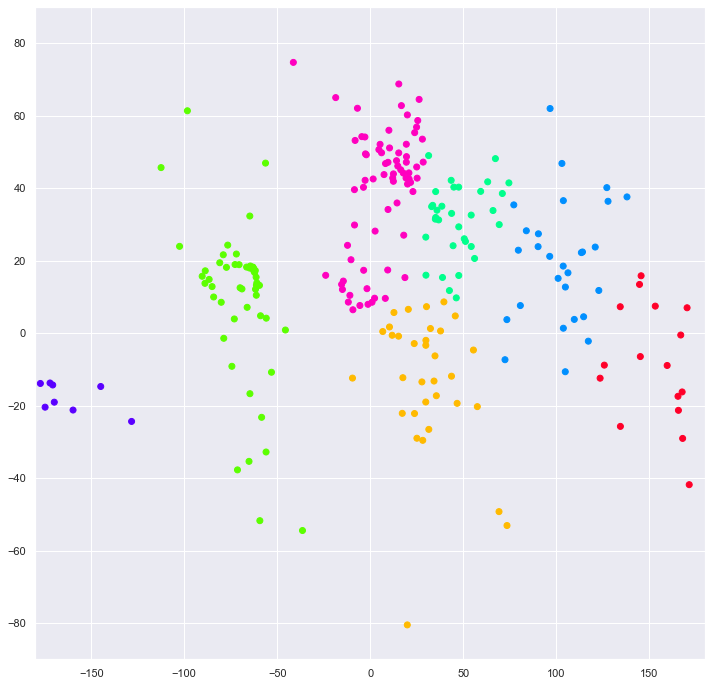

In [29]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.figure(figsize=(12,12))
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='gist_rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()